Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Select(name='X-Axis Column', options=['maritl', 'race', ...], value='education')
    [3] Matplotlib(Figure, sizing_mode='stretch_width')
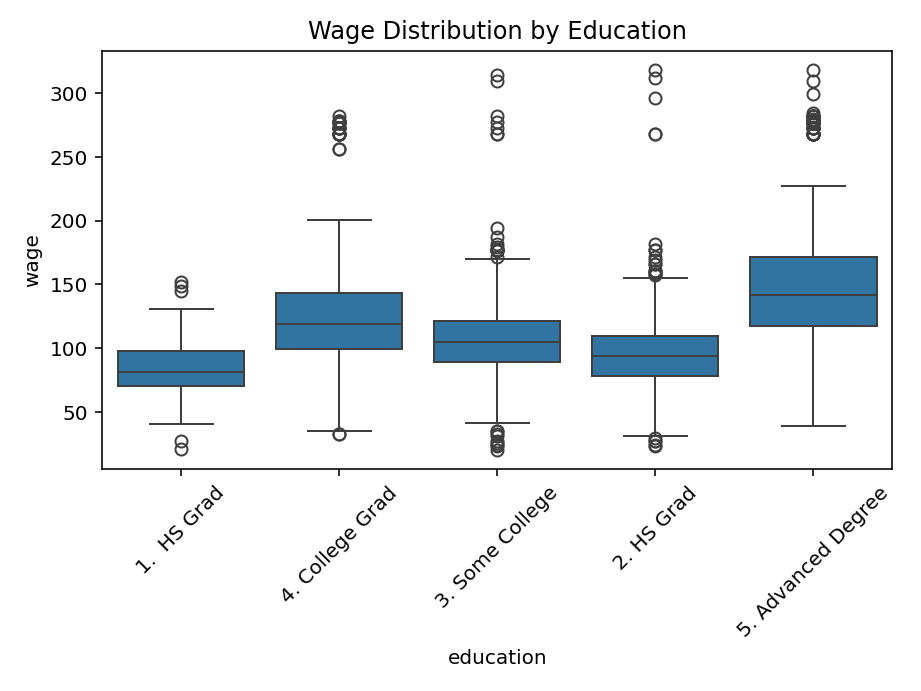

In [34]:
import panel as pn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pn.extension()

# Load and clean dataset
df = pd.read_csv(r'C:\\Users\\andre\\OIM7502_SP25\\data\\Wage.csv')
df['education'] = (
    df['education']
    .str.replace(r'^\\d+\\.\\s*<*\\s*', '', regex=True)
    .str.replace('<', '')
    .str.strip()
)
df['jobclass'] = (
    df['jobclass']
    .astype(str)
    .str.replace(r'^\\d+\\.\\s*<*\\s*', '', regex=True)
    .str.strip()
)

# Select only categorical columns for x-axis options
categorical_columns = df.select_dtypes(include='object').columns.tolist()
x_axis_select = pn.widgets.Select(name='X-Axis Column', options=categorical_columns, value='education')

# Create an empty Matplotlib pane
plot_panel = pn.pane.Matplotlib(sizing_mode='stretch_width')

# Callback function to update plot
def update_plot(event=None):
    x_col = x_axis_select.value
    fig, ax = plt.subplots()
    sns.boxplot(data=df, x=x_col, y='wage', ax=ax)
    ax.set_title(f"Wage Distribution by {x_col.title()}")
    plt.setp(ax.get_xticklabels(), rotation=45)
    fig.tight_layout()
    plot_panel.object = fig
    plt.close(fig)

# Attach callback
x_axis_select.param.watch(update_plot, 'value')

# Trigger initial plot
update_plot()

# Layout
pn.Column(
    "# Wage Explorer (Boxplot)",
    "Select a column for the x-axis:",
    x_axis_select,
    plot_panel
).servable()

